In [ ]:
!pip uninstall tensorflow

In [ ]:
!pip install tensorflow==1.15 # 1.15 버전 Tensorflow 설치

# Learning rate and Evaluation
- learning rate에 따라 가중치의 변화와 과적합을 확인해본다.

In [4]:
import tensorflow as tf
tf.set_random_seed(777)  # for reproducibility

x_data = [[1, 2, 1],
          [1, 3, 2],
          [1, 3, 4],
          [1, 5, 5],
          [1, 7, 5],
          [1, 2, 5],
          [1, 6, 6],
          [1, 7, 7]]
y_data = [[0, 0, 1], # one-hot encoding so Our model use softmax
          [0, 0, 1],
          [0, 0, 1],
          [0, 1, 0],
          [0, 1, 0],
          [0, 1, 0],
          [1, 0, 0],
          [1, 0, 0]]

# Evaluation our model using this test dataset
x_test = [[2, 1, 1],
          [3, 1, 2],
          [3, 3, 4]]
y_test = [[0, 0, 1],
          [0, 0, 1],
          [0, 0, 1]]

X = tf.placeholder(tf.float32, [None, 3])
Y = tf.placeholder(tf.float32, [None, 3])

W = tf.Variable(tf.random_normal([3, 3]), name = 'weight')
b = tf.Variable(tf.random_normal([3]), name = 'bias')

hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis = 1))
train = tf.train.GradientDescentOptimizer(learning_rate=0.5).minimize(cost)

prediction = tf.arg_max(hypothesis, 1) # 예상 결과를 얻음
is_correct = tf.equal(prediction, tf.arg_max(Y, 1)) # 예상 결과가 실제와 동일한지 확인
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32)) # 예측 결과와 실제 결과를 비교해 평균을 내 예측 정확도를 계산

In [5]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for step in range(2001):
        cost_val,W_val, _ = sess.run([cost, W, train], feed_dict={X: x_data, Y: y_data})
        if step % 500 == 0:
            print(step, cost_val, W_val)

    print("Prediction : ", sess.run(prediction, feed_dict={X:x_test}))
    print("Accuracy : ", sess.run(accuracy, feed_dict={X:x_test, Y:y_test}))

0 5.73203 [[ 0.43330055  0.8623587  -1.0316339 ]
 [-1.6670122   0.56342864  2.0034606 ]
 [-0.61021996  0.2318834  -1.6735345 ]]
500 1.2327393 [[-9.7329235   3.7716165   6.225335  ]
 [ 1.0818952  -0.9341937   0.75217843]
 [ 2.9445136  -1.8599472  -3.1364346 ]]
1000 1.6639698 [[-15.9374485    5.2894363   10.912043  ]
 [  0.59360206   0.08243752   0.22384499]
 [  5.691803    -2.9573002   -4.786362  ]]
1500 0.05676901 [[-17.915953     4.7851143   13.394869  ]
 [  0.3961352    0.37313062   0.13062029]
 [  5.914967    -2.0060148   -5.960811  ]]
2000 0.042827405 [[-18.093506     4.0025053   14.354982  ]
 [  0.44332796   0.3506808    0.10587936]
 [  5.9752226   -1.6526142   -6.3744617 ]]
Prediction :  [2 2 2]
Accuracy :  1.0


# Linear regerssion using non regularization data
- 일반화되지 않은 데이터를 사용해 모델을 학습해본 후 예측값과 비용을 확인해본다.

In [6]:
import tensorflow as tf
import numpy as np
tf.set_random_seed(777)  # for reproducibility


xy = np.array([[828.659973, 833.450012, 908100, 828.349976, 831.659973],
               [823.02002, 828.070007, 1828100, 821.655029, 828.070007],
               [819.929993, 824.400024, 1438100, 818.97998, 824.159973],
               [816, 820.958984, 1008100, 815.48999, 819.23999],
               [819.359985, 823, 1188100, 818.469971, 818.97998],
               [819, 823, 1198100, 816, 820.450012],
               [811.700012, 815.25, 1098100, 809.780029, 813.669983],
               [809.51001, 816.659973, 1398100, 804.539978, 809.559998]])

x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

X = tf.placeholder(tf.float32, [None, 4])
Y = tf.placeholder(tf.float32, [None, 1])

W = tf.Variable(tf.random_normal([4, 1]))
b = tf.Variable(tf.random_normal([1]))

hypothesis = tf.matmul(X, W) + b

cost = tf.reduce_mean(tf.square(hypothesis - Y))
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

In [7]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(11):
    cost_val, hy_val, _ = sess.run([cost, hypothesis, train], feed_dict={X:x_data, Y:y_data})

    if step % 2 == 0:
        print(step, "Cost : ", cost_val, "\nPrediction : \n", hy_val)

0 Cost :  2519696000000.0 
Prediction : 
 [[1120640. ]
 [2254801.8]
 [1774008. ]
 [1243901.9]
 [1465808. ]
 [1478132.2]
 [1354844.1]
 [1724677.5]]
2 Cost :  inf 
Prediction : 
 [[1.2302029e+27]
 [2.4765247e+27]
 [1.9481927e+27]
 [1.3656727e+27]
 [1.6095183e+27]
 [1.6230653e+27]
 [1.4875955e+27]
 [1.8940047e+27]]
4 Cost :  inf 
Prediction : 
 [[inf]
 [inf]
 [inf]
 [inf]
 [inf]
 [inf]
 [inf]
 [inf]]
6 Cost :  nan 
Prediction : 
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
8 Cost :  nan 
Prediction : 
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
10 Cost :  nan 
Prediction : 
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]


# Linear regerssion using non regularization data
- 앞서 확인한 문제를 일반화하여 다시 모델을 구축해본다.

In [8]:
import tensorflow as tf
import numpy as np
tf.set_random_seed(777)

def min_max_scaler(data):
    numerator = data - np.min(data, 0) # 행을 기준(즉 같은 열에서 다른 행까리)으로 가장 작은 값을 빼준다.
    denominator = np.max(data ,0) - np.min(data ,0)
    return numerator / (denominator + 1e-7) # 1e-7은 0으로 나뉘는 것을 방지하기 위한 설정

xy = np.array(
    [
        [828.659973, 833.450012, 908100, 828.349976, 831.659973],
        [823.02002, 828.070007, 1828100, 821.655029, 828.070007],
        [819.929993, 824.400024, 1438100, 818.97998, 824.159973],
        [816, 820.958984, 1008100, 815.48999, 819.23999],
        [819.359985, 823, 1188100, 818.469971, 818.97998],
        [819, 823, 1198100, 816, 820.450012],
        [811.700012, 815.25, 1098100, 809.780029, 813.669983],
        [809.51001, 816.659973, 1398100, 804.539978, 809.559998],
    ]
)

# very important. It does not work without it.
xy = min_max_scaler(xy)
print(xy)

[[0.99999999 0.99999999 0.         1.         1.        ]
 [0.70548491 0.70439552 1.         0.71881782 0.83755791]
 [0.54412549 0.50274824 0.57608696 0.606468   0.6606331 ]
 [0.33890353 0.31368023 0.10869565 0.45989134 0.43800918]
 [0.51436    0.42582389 0.30434783 0.58504805 0.42624401]
 [0.49556179 0.42582389 0.31521739 0.48131134 0.49276137]
 [0.11436064 0.         0.20652174 0.22007776 0.18597238]
 [0.         0.07747099 0.5326087  0.         0.        ]]


In [9]:
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

X = tf.placeholder(tf.float32, [None, 4])
Y = tf.placeholder(tf.float32, [None, 1])

W = tf.Variable(tf.random_normal([4, 1]))
b = tf.Variable(tf.random_normal([1]))

hypothesis = tf.matmul(X, W) + b

cost = tf.reduce_mean(tf.square(hypothesis - Y))
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

In [10]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for step in range(101):
        _, cost_val, hy_val = sess.run([train, cost, hypothesis], feed_dict={X:x_data, Y:y_data})
        if step % 10 == 0:
            print(step, "Cost : ", cost_val, "\nPrediction : \n", hy_val)

0 Cost :  6.008363 
Prediction : 
 [[-2.787303  ]
 [-2.3049731 ]
 [-1.9524163 ]
 [-1.5445647 ]
 [-1.8520749 ]
 [-1.818827  ]
 [-1.0787338 ]
 [-0.97747326]]
10 Cost :  2.7995067 
Prediction : 
 [[-1.7260447 ]
 [-1.2919793 ]
 [-1.107867  ]
 [-0.8902476 ]
 [-1.0757754 ]
 [-1.0699522 ]
 [-0.584193  ]
 [-0.49664545]]
20 Cost :  1.3252835 
Prediction : 
 [[-1.002097  ]
 [-0.6062571 ]
 [-0.5363921 ]
 [-0.44783562]
 [-0.5501059 ]
 [-0.563228  ]
 [-0.25258777]
 [-0.17600113]]
30 Cost :  0.64668417 
Prediction : 
 [[-0.50674164]
 [-0.14214523]
 [-0.14982213]
 [-0.14889976]
 [-0.19415669]
 [-0.22046968]
 [-0.0312125 ]
 [ 0.03633238]]
40 Cost :  0.3330974 
Prediction : 
 [[-0.1663513 ]
 [ 0.17190732]
 [ 0.11154894]
 [ 0.05289774]
 [ 0.04686243]
 [ 0.01126694]
 [ 0.11562055]
 [ 0.17547695]]
50 Cost :  0.1870483 
Prediction : 
 [[0.06893792]
 [0.38435245]
 [0.28815177]
 [0.18893513]
 [0.21005383]
 [0.16783392]
 [0.21207482]
 [0.26521102]]
60 Cost :  0.117970854 
Prediction : 
 [[0.23289844]
 [0.5280

# Mnist example

In [14]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random
tf.set_random_seed(777)

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)
nb_class = 10 # 손글씨 데이터의 결과 값의 개수 (one-hot encoding 해야 하는 수와 동일하다)

X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, nb_class])

W = tf.Variable(tf.random_normal([784, nb_class]), name = 'weight')
b = tf.Variable(tf.random_normal([nb_class]), name = 'bias')

hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis = 1))
train = tf.train.GradientDescentOptimizer(learning_rate=1.2).minimize(cost)

correct = tf.equal(tf.arg_max(hypothesis, 1), tf.arg_max(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Epoch : 0001, Cost : 0.982389385
Epoch : 0002, Cost : 0.515100763
Epoch : 0003, Cost : 0.442631177
Epoch : 0004, Cost : 0.408291965
Epoch : 0005, Cost : 0.382358407
Epoch : 0006, Cost : 0.362292466
Epoch : 0007, Cost : 0.352220718
Epoch : 0008, Cost : 0.342500273
Epoch : 0009, Cost : 0.333158801
Epoch : 0010, Cost : 0.329064980
Epoch : 0011, Cost : 0.319258135
Epoch : 0012, Cost : 0.315724332
Epoch : 0013, Cost : 0.310897515
Epoch : 0014, Cost : 0.308639464
Epoch : 0015, Cost : 0.305630302
Epoch : 0016, Cost : 0.303692369
Epoch : 0017, Cost : 0.300013648
Epoch : 0018, Cost : 0.297278057
Epoch : 0019, Cost : 0.295066724
Epoch : 0020, Cost : 0.290852371
Learning finish
Accuracy :  0.9117
Label :  [7]
Prediction :  [7]


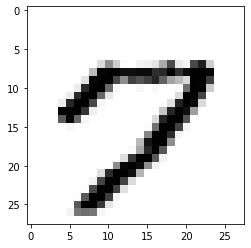

In [15]:
num_epochs = 20
batch_size = 100
num_iterations = int(mnist.train.num_examples / batch_size)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for epoch in range(num_epochs):
        avg_cost = 0
        for i in range(num_iterations):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size=batch_size)
            _, cost_val = sess.run([train, cost], feed_dict={X:batch_xs, Y:batch_ys})
            avg_cost += cost_val / num_iterations # 평균 cost를 구함 (num_iterations를 사용)
        print("Epoch : {:04d}, Cost : {:.9f}".format(epoch + 1, avg_cost))

    print("Learning finish")

    # eval() 함수는 저장된 Tensor의 값을 볼 수 있는 함수이다. 일반적으로 session이 있어야 하며 with 절 밖에서는 작동이 되지 않는다. 따라서 인자로 session을 설정해야 한다.
    print("Accuracy : ", accuracy.eval(session=sess, feed_dict={X:mnist.test.images, Y:mnist.test.labels}))
    print("======================================================")

    r = random.randint(0, mnist.test.num_examples - 1)
    print("Label : ", sess.run(tf.arg_max(mnist.test.labels[r : r + 1], 1)))
    print("Prediction : ", sess.run(tf.arg_max(hypothesis, 1), feed_dict={X:mnist.test.images[r : r + 1]}))

    # interpolation이란 보간이라는 뜻으로 화면의 해상도와 이미지의 해상도가 다를 경우에 사용된다.
    # 이미지를 압축했다가 다시 압축을 풀때 주로 사용됨
    plt.imshow(mnist.test.images[r : r + 1].reshape(28, 28), cmap = "Greys", interpolation="nearest")
    plt.show()